# Artificial Neural Networks

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

tf.get_logger().setLevel(logging.ERROR)

## Import MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = tf.cast(X_train, tf.float32) / 255.
X_test = tf.cast(X_test, tf.float32) / 255.

In [3]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_test : {y_test.shape}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test : (10000, 28, 28)
Y_test : (10000,)


## ANN Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, 'relu'),
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(25, 'relu'),
    tf.keras.layers.Dense(10)
], name = 'ANN')

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.summary()

Model: "ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,685 (717.52 KB)

 Trainable params: 183,685 (717.52 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
BATCH_SIZE = 64
EPOCHS = 10

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8320 - loss: 0.5819
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9670 - loss: 0.1105
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9777 - loss: 0.0707
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0539
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9863 - loss: 0.0416
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9897 - loss: 0.0322
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9901 - loss: 0.0304
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9922 - loss: 0.0244
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0200
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9938 - loss: 0.0176


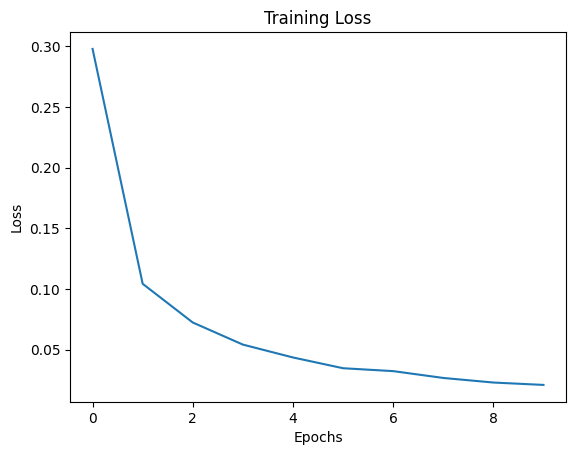

In [6]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Performance on test set:')
print(f'Loss: {test_loss}\nAccuracy: {test_accuracy}')

Performance on test set:
Loss: 0.08308149129152298
Accuracy: 0.9776999950408936
